In [3]:
import numpy as np
import sys

# THIS IS FOR PLOTTING
%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import warnings
warnings.filterwarnings("ignore")

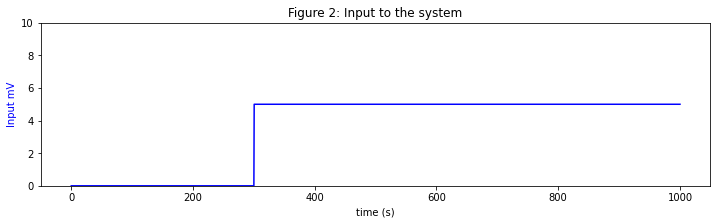

In [5]:
h=0.5 #step size
input_onset=300             # Onset of input
input_amp=5                 # AMPLITUDE OF INPUT


time=np.arange(0,1000.1,h)  # time period 1000ms (1s)

def Input(input_onset,input_amp):
    I=np.zeros((len(time)))     # CURRENT (INPUT)

    for k in range (0,len(time)):
        if time[k] >input_onset:
            I[k]=input_amp # Input change
    return I

# PLOTTING THE INPUT    
fig, ax1 = plt.subplots(figsize=(12,3))
ax1.plot(time, Input(input_onset,input_amp), 'b-') # y label
ax1.set_xlabel('time (s)') # x label
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Input mV', color='b')
ax1.set_ylim(0,input_amp*2) # setting the plotting range
plt.title('Figure 2: Input to the system')
plt.show()